In [39]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [40]:
# Load the Default Credit Card clients data

dccdata = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\PCA & LDA\Default_Credit_Card_Clients_SVM.csv", header=0)

# Copy data to back-up files

dccdata_bk = dccdata.copy()

# Display first 5 records

dccdata.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [41]:
# Display the dataset information

dccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [42]:
# Rename the last column to CC_Default

dccdata.rename({'default payment next month': 'CC_Default'}, axis=1, inplace=True)
dccdata.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,CC_Default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Dealing w/ Missing Data

In [43]:
dccdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          30000 non-null  int64
 1   LIMIT_BAL   30000 non-null  int64
 2   SEX         30000 non-null  int64
 3   EDUCATION   30000 non-null  int64
 4   MARRIAGE    30000 non-null  int64
 5   AGE         30000 non-null  int64
 6   PAY_1       30000 non-null  int64
 7   PAY_2       30000 non-null  int64
 8   PAY_3       30000 non-null  int64
 9   PAY_4       30000 non-null  int64
 10  PAY_5       30000 non-null  int64
 11  PAY_6       30000 non-null  int64
 12  BILL_AMT1   30000 non-null  int64
 13  BILL_AMT2   30000 non-null  int64
 14  BILL_AMT3   30000 non-null  int64
 15  BILL_AMT4   30000 non-null  int64
 16  BILL_AMT5   30000 non-null  int64
 17  BILL_AMT6   30000 non-null  int64
 18  PAY_AMT1    30000 non-null  int64
 19  PAY_AMT2    30000 non-null  int64
 20  PAY_AMT3    30000 non-null  

In [44]:
# Display the data types of variables

dccdata.dtypes

ID            int64
LIMIT_BAL     int64
SEX           int64
EDUCATION     int64
MARRIAGE      int64
AGE           int64
PAY_1         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
CC_Default    int64
dtype: object

In [45]:
# Display the unique valus of the variables

dccdata.nunique()

ID            30000
LIMIT_BAL        81
SEX               2
EDUCATION         7
MARRIAGE          4
AGE              56
PAY_1            11
PAY_2            11
PAY_3            11
PAY_4            11
PAY_5            10
PAY_6            10
BILL_AMT1     22723
BILL_AMT2     22346
BILL_AMT3     22026
BILL_AMT4     21548
BILL_AMT5     21010
BILL_AMT6     20604
PAY_AMT1       7943
PAY_AMT2       7899
PAY_AMT3       7518
PAY_AMT4       6937
PAY_AMT5       6897
PAY_AMT6       6939
CC_Default        2
dtype: int64

In [46]:
# Display the missing values sum by variables

dccdata.isnull().sum()

ID            0
LIMIT_BAL     0
SEX           0
EDUCATION     0
MARRIAGE      0
AGE           0
PAY_1         0
PAY_2         0
PAY_3         0
PAY_4         0
PAY_5         0
PAY_6         0
BILL_AMT1     0
BILL_AMT2     0
BILL_AMT3     0
BILL_AMT4     0
BILL_AMT5     0
BILL_AMT6     0
PAY_AMT1      0
PAY_AMT2      0
PAY_AMT3      0
PAY_AMT4      0
PAY_AMT5      0
PAY_AMT6      0
CC_Default    0
dtype: int64

In [47]:
# Display unique values of variable 'Education'

dccdata['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [48]:
# Display unique values of variable 'Marriage'

dccdata['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [49]:
# Missing value data size

dccdata_missing = (dccdata[(dccdata.EDUCATION == 0) | (dccdata.MARRIAGE == 0)])
dccdata_missing.shape

(68, 25)

In [50]:
# No Missing value data size

dccdata_no_missing = dccdata[(dccdata.EDUCATION != 0) & (dccdata.MARRIAGE != 0)]

dccdata_no_missing.shape

(29932, 25)

In [51]:
col1 = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
print (col1)

['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [52]:
# Create dummy variables for categorical data

dccdata_no_missing = pd.get_dummies(dccdata_no_missing, columns= col1)
dccdata_no_missing.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,CC_Default,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-2,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [53]:
cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [54]:
print (cols)

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [55]:
# Delete the unneccsary variables

del dccdata_no_missing['ID']

In [56]:
# Identify the independent and Target variables

IndepVar = []
for col in dccdata_no_missing.columns:
    if col != 'CC_Default':
        IndepVar.append(col)

TargetVar = 'CC_Default'

x = dccdata_no_missing[IndepVar]
y = dccdata_no_missing[TargetVar]

In [57]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [58]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

In [59]:
# Load the Hyperparameter tunining result dataset

HTResults = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\PCA & LDA\HTResults.csv", header=0)
HTResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# ExtraTreesClassifier without PCA

Confusion matrix : 
 [[ 707 1261]
 [ 426 6586]]
Outcome values : 
 707 1261 426 6586
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.36      0.46      1968
           0       0.84      0.94      0.89      7012

    accuracy                           0.81      8980
   macro avg       0.73      0.65      0.67      8980
weighted avg       0.79      0.81      0.79      8980

Accuracy : 81.2 %
Precision : 62.4 %
Recall : 35.9 %
F1 Score : 0.456
Specificity or True Negative Rate : 93.9 %
Balanced Accuracy : 64.9 %
MCC : 0.372
roc_auc_score: 0.649


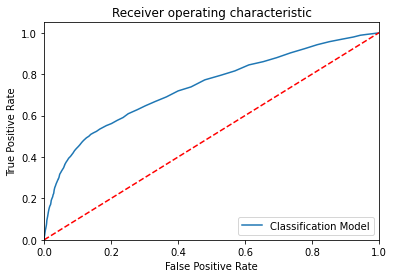

-----------------------------------------------------------------------------------------------------


In [60]:
# To build the 'ExtraTreesClassifier' model with random sampling

from sklearn.ensemble import ExtraTreesClassifier

ModelET = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                               n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                               ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelET,
           'True Positive': tp,
           'False Negative': fn, 
           'False Positive': fp, 
           'True Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [61]:
HTResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"(ExtraTreeClassifier(random_state=409201975), ...",707,1261,426,6586,0.812,0.624,0.359,0.456,0.939,0.372,0.649247,0.649


# ExtraTreesClassifier with PCA

In [62]:
# Principal component analysis (PCA) is a statistical technique to convert high dimensional data to low dimensional data 
# by selecting the most important features that capture maximum information about the dataset. The features are selected 
# on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal
# component. The feature that is responsible for second highest variance is considered the second principal component, 
# and so on. It is important to mention that principal components do not have any correlation with each other.

from sklearn.decomposition import PCA

applyPCA = PCA()

x_train = applyPCA.fit_transform(x_train)
x_test = applyPCA.transform(x_test)
explained_variance = applyPCA.explained_variance_ratio_
print(explained_variance)

[2.64659240e-01 1.20001860e-01 9.53182626e-02 8.71154067e-02
 7.80049594e-02 6.27492061e-02 4.44732502e-02 3.51687421e-02
 2.67278219e-02 2.41659879e-02 1.87921659e-02 1.81322714e-02
 1.41542318e-02 1.35996468e-02 1.26870100e-02 1.09422361e-02
 8.84303795e-03 8.46739881e-03 7.07953386e-03 6.81039101e-03
 4.46725162e-03 4.29955242e-03 3.47868585e-03 3.35240171e-03
 2.78024281e-03 2.72231630e-03 2.43360954e-03 2.36381443e-03
 1.95465164e-03 1.86685601e-03 1.45625787e-03 1.28835213e-03
 1.18291681e-03 1.03241224e-03 9.27759376e-04 9.10164667e-04
 8.20979608e-04 4.98614653e-04 4.12770354e-04 4.05282322e-04
 3.77556927e-04 3.37507982e-04 2.67007600e-04 2.50282301e-04
 2.09004225e-04 2.01070467e-04 1.83338615e-04 1.78677051e-04
 1.53907637e-04 1.38012816e-04 1.35212478e-04 1.28440358e-04
 1.08627960e-04 1.04936110e-04 8.58672568e-05 8.05640038e-05
 7.15239814e-05 6.23809878e-05 5.77417949e-05 4.76808808e-05
 4.16180486e-05 3.07149675e-05 2.77245272e-05 2.72213751e-05
 2.55933406e-05 2.394360

Confusion matrix : 
 [[ 560 1408]
 [ 309 6703]]
Outcome values : 
 560 1408 309 6703
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.28      0.39      1968
           0       0.83      0.96      0.89      7012

    accuracy                           0.81      8980
   macro avg       0.74      0.62      0.64      8980
weighted avg       0.79      0.81      0.78      8980

Accuracy : 80.9 %
Precision : 64.4 %
Recall : 28.5 %
F1 Score : 0.395
Specificity or True Negative Rate : 95.6 %
Balanced Accuracy : 62.0 %
MCC : 0.336
roc_auc_score: 0.62


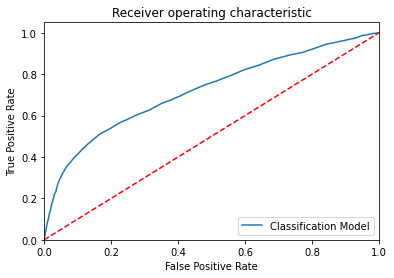

-----------------------------------------------------------------------------------------------------


In [63]:
# To build the 'ExtraTreesClassifier' model with random sampling and PCA

from sklearn.ensemble import ExtraTreesClassifier

ModelET = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                               n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                               ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelET,
           'True Positive': tp,
           'False Negative': fn, 
           'False Positive': fp, 
           'True Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [64]:
HTResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"(ExtraTreeClassifier(random_state=409201975), ...",707,1261,426,6586,0.812,0.624,0.359,0.456,0.939,0.372,0.649247,0.649
1,"(ExtraTreeClassifier(random_state=813015348), ...",560,1408,309,6703,0.809,0.644,0.285,0.395,0.956,0.336,0.620243,0.62


# ExtraTreesClassifier with LDA

In [65]:
# ExtraTreesClassifier with 'Linear Discriminant Analysis' technique to reduce the dimentionality

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

applyLDA = LinearDiscriminantAnalysis()

x_train = applyLDA.fit_transform(x_train, y_train)
x_test = applyLDA.transform(x_test)
explained_variance = applyLDA.explained_variance_ratio_
print(explained_variance)

[1.]


Confusion matrix : 
 [[ 834 1134]
 [1563 5449]]
Outcome values : 
 834 1134 1563 5449
Classification report : 
               precision    recall  f1-score   support

           1       0.35      0.42      0.38      1968
           0       0.83      0.78      0.80      7012

    accuracy                           0.70      8980
   macro avg       0.59      0.60      0.59      8980
weighted avg       0.72      0.70      0.71      8980

Accuracy : 70.0 %
Precision : 34.8 %
Recall : 42.4 %
F1 Score : 0.382
Specificity or True Negative Rate : 77.7 %
Balanced Accuracy : 60.0 %
MCC : 0.188
roc_auc_score: 0.6


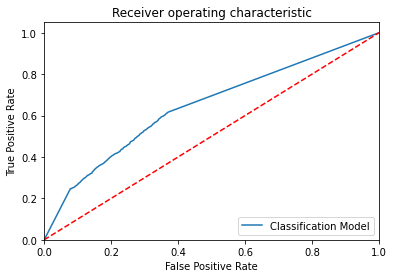

-----------------------------------------------------------------------------------------------------


In [66]:
# To build the 'ExtraTreesClassifier' model with random sampling / 'Linear Discriminant Analysis' technique

from sklearn.ensemble import ExtraTreesClassifier

ModelET = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                               n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                               ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelET,
           'True Positive': tp,
           'False Negative': fn, 
           'False Positive': fp, 
           'True Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [69]:
HTResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"(ExtraTreeClassifier(random_state=409201975), ...",707,1261,426,6586,0.812,0.624,0.359,0.456,0.939,0.372,0.649247,0.649
1,"(ExtraTreeClassifier(random_state=813015348), ...",560,1408,309,6703,0.809,0.644,0.285,0.395,0.956,0.336,0.620243,0.62
2,"(ExtraTreeClassifier(random_state=1927378951),...",834,1134,1563,5449,0.7,0.348,0.424,0.382,0.777,0.188,0.600438,0.6
